# Overview: 
## Our purpose is to build a Machine Learning model that can accurately predict apartment prices in the capital city of Romania.   





# Exploratory Data Analysis (EDA)

After scraping records from a popular real estate website in Romania, the analysis stage may begin. Let us first take a look at the dataset. This set of data contains many features that could impact change in apartment prices. It is fitting to make an attempt at explaining everything starting from the nature of the data, up until positive/negative relations between each existing feature. After clearly understanding how collected data behaves, and making vital changes (cleaning the data where necessary), the creation of a machine learning model can proceed. 

**Why should data be thoroughly inspected before fitting a model to it?** Since the aim of this project is to predict a given feature as accurately as possible, it is only appropriate to ensure the data is a good match for our model.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

The **pandas library** allows for ideal comprehensive use of data. We shall create a **'DataFrame' object** (a structured way of representing datasets in pandas) and read the 'csv' (comma separated values) file which holds the extracted information. We would also like to see all of the existing columns, and ensure that if we change something in the dataset, we do it on a copy, so as to not negatively affect the true dataset which might prove useful later in time. 

In [2]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
df = pd.read_csv(r'C:\Users\Calin\Desktop\Personal-Project\WebScraping\apartamente.csv')
df_copy = df.copy()

Let's look at the size of the dataset. Using one of the many functions that pandas provides, **the exact number of rows and columns is shown.**

In [3]:
df_copy.shape

(9994, 18)

To get a quick glance on the **first 5 values** of the dataframe, pandas comes to aid once again.

In [4]:
df_copy.head()

,Unnamed: 0,Nr camere,Suprafata utila,Suprafata utila totala,Suprafata construita,Compartimentare,Confort,Etaj,Nr. bucatarii,Nr. bai,An constructie,Structura rezistenta,Tip imobil,Regim inaltime,Nr. garaje,Nr. locuri parcare,Nr. balcoane,Pret
0,0,2.0,65,NaN,79,semidecomand,1,Etaj 1 / 6,1.0,1.0,2018,beton,bloc de apartamente,P+6E,NaN,1,1,39.900
1,1,3.0,113,NaN,146,decomand,1,Etaj 1 / 9,1.0,2.0,2012,beton,bloc de apartamente,P+9E,NaN,1,1,62.500
2,2,3.0,131,NaN,NaN,NaN,1,Parter / 5,1.0,1.0,2020 (finalizata),beton,bloc de apartamente,P+5E,NaN,1,NaN,81.000
3,3,2.0,65,65.0,65,decomand,1,Etaj 1 / 5,1.0,1.0,2019,beton,bloc de apartamente,P+5E,NaN,NaN,1 (închise),42.400
4,4,2.0,66,66.0,66,decomand,1,Etaj 1 / 4,1.0,1.0,2020 (finalizata),beton,bloc de apartamente,P+4E,NaN,NaN,1 (închise),35.700


Should we opt for a different approach to checking records, another pandas function allows for **randomized observations** to appear as a result of a provided number. 

In [5]:
df_copy.sample(50)

,Unnamed: 0,Nr camere,Suprafata utila,Suprafata utila totala,Suprafata construita,Compartimentare,Confort,Etaj,Nr. bucatarii,Nr. bai,An constructie,Structura rezistenta,Tip imobil,Regim inaltime,Nr. garaje,Nr. locuri parcare,Nr. balcoane,Pret
298,298,3.0,"106,23",NaN,"114,5",semidecomand,1,Parter / 7,1.0,2.0,2020 (in constructie),beton,bloc de apartamente,P+7E,NaN,NaN,NaN,86.900
8684,8684,4.0,100,NaN,120,decomand,1,Etaj 3 / 9,1.0,2.0,1991,beton,bloc de apartamente,P+9E,NaN,NaN,2,189.000
7038,7038,2.0,46,46.00,54,semidecomand,1,Etaj 2 / 5,1.0,1.0,2020 (in constructie),beton,bloc de apartamente,D+P+5E,NaN,1,1,46.000
1924,1924,2.0,59,65.00,70,decomand,1,Etaj 4 / 8,1.0,1.0,2017,beton,bloc de apartamente,P+8E,NaN,NaN,1,115.000
2927,2927,3.0,86,104.00,124,decomand,1,Etaj 3 / 5,1.0,2.0,2019,beton,bloc de apartamente,P+5E,NaN,NaN,1,225.000
6987,6987,2.0,50,NaN,55,decomand,1,Etaj 2 / 5,NaN,1.0,2020 (finalizata),NaN,bloc de apartamente,D+P+5E,NaN,NaN,1,41.500
7230,7230,3.0,86,97.00,135,decomand,1,Etaj 5,1.0,1.0,2020 (in constructie),NaN,bloc de apartamente,S+D+P,NaN,NaN,NaN,174.600
9914,9914,2.0,50,NaN,55,decomand,1,Etaj 2 / 10,1.0,1.0,1970,beton,bloc de apartamente,P+10E,NaN,1,1 (închise),56.000
5544,5544,3.0,77,95.00,95,decomand,1,Etaj 6 / 10,1.0,2.0,2020 (finalizata),beton,bloc de apartamente,S+P+10E,NaN,1,1,196.413
8986,8986,4.0,112,200.00,238,decomand,lux,Etaj 3 / 3,1.0,2.0,2021 (in constructie),beton,bloc de apartamente,P+3E,NaN,NaN,NaN,188.900


It appears as though the **first column simply shows the position of each row.** This is due to the data being inside of a DataFrame before becoming a 'csv' file. Besides the fact that this type of information is not useful in any way, it may also be detrimental to our model, so dropping the column from the dataframe is how we treat this issue.

In [6]:
df_copy.drop('Unnamed: 0', inplace=True, axis=1)

Moreover, useful information about our data can further be deducted, such as **existing columns, the number of values that are not null (the null values are empty cells, regarded as missing values), and also the data type of each variable.** As observed, the dataset contains both numerical values (int64, float64) and either text or mixed numeric or non-numeric values (object). Columns containing numbers are the numerical (quantitative) variables of the dataset, while information presented by a certain category is regarded as a categorical (qualitative) variable, just as the name states.

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr camere               9993 non-null   float64
 1   Suprafata utila         9924 non-null   object 
 2   Suprafata utila totala  3499 non-null   float64
 3   Suprafata construita    8899 non-null   object 
 4   Compartimentare         9769 non-null   object 
 5   Confort                 9716 non-null   object 
 6   Etaj                    9994 non-null   object 
 7   Nr. bucatarii           8486 non-null   float64
 8   Nr. bai                 9543 non-null   float64
 9   An constructie          9834 non-null   object 
 10  Structura rezistenta    7381 non-null   object 
 11  Tip imobil              9958 non-null   object 
 12  Regim inaltime          9768 non-null   object 
 13  Nr. garaje              495 non-null    float64
 14  Nr. locuri parcare      2488 non-null   

By taking a closer look at the 17 columns and their data types, it can be observed that most features do not match their given 'Dtypes'. This happens because typos and other different scenarios alter the records. As a result, let us transform them acordingly and provide proper reasoning.


**1. Nr camere**

'Nr camere' (number of rooms) is the first variable in our dataset. It has 1 value  that is missing. As observed, its Dtype is float64. My initial thought was to convert it from float64 to integer64. However, by the looks of things, when missing values appear inside of a float64 data type column and a conversion  of the data type to interger takes place, the transformation occurs in both the actual values and missing values. This is problematic, as values different from 'NaN' raise errors in the proceeding stages of the analysis. Considering this, the final decision was to leave 'Nr camere' as is.

**2. Suprafata utila**

'Suprafata utila' (usable area) contains some missing values and its data type is object. Since all the records are numbers, why is it not of float data type?. The character ',' appears insead of '.'. European countries use ',' when '.' is expected and vice versa. This explaines why the website had used ',' compared to '.' and why float is the default data type for the column.
The only change made was the conversion of ',' to '.'.


**3. Suprafata utila totala**
'Suprafata utila totala' (total usable area) differs from 'Suprafata utila' (usable area) 












It appears that the column contains both ',' and '.', thus turning it into 'object' data type. Moreover, it even has values with the character '.' appearing 2 times.


is what I chose to leave the '.' as they are simply because they will appear as outliers, allowing for an appropriate way to handle. The ',' was converted to '.'.





**5. Compartimentare**

'Compartimentare' (partitioning) is the first categorical variable we encouterer which specifies whether the apartment is detached, semidetached or circular.




In [8]:
# Suprafata utila
bool_series_utila = df_copy['Suprafata utila'].str.contains(',')
nump_array_utila = np.where(bool_series_utila, df_copy['Suprafata utila'].str.replace(',', '.'), df_copy['Suprafata utila'])
df_copy['Suprafata utila'] = pd.DataFrame(nump_array_utila)
df_copy['Suprafata utila'] = df_copy['Suprafata utila'].astype('float64')


# Suprafata construita
bool_series_construita = df_copy['Suprafata construita'].str.contains(',')
nump_array_construita = np.where(bool_series_construita, df_copy['Suprafata construita'].str.replace(',', '.'), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita)
bool_series_construita_2 = df_copy['Suprafata construita'].str.contains('\d\d\.\d\d\d\.', regex = True)
nump_array_construita_2 = np.where(bool_series_construita_2, df_copy['Suprafata construita'].str.replace('.', ''), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita_2)
df_copy['Suprafata construita'] = df_copy['Suprafata construita'].astype('float64')


# Etaj
lst_etaj = list()
for item in df_copy['Etaj']:
    result = re.sub('/\s\d+', '', item)
    lst_etaj.append(result)
df_copy['Etaj'] = pd.DataFrame(lst_etaj, columns = ['Etaj'])


# Nr. locuri parcare
lst_locuri_parcare = list()
for item in df_copy['Nr. locuri parcare']:
    item = str(item)
    result = re.sub(r'-\sI.*', '', item)
    lst_locuri_parcare.append(result)
df_copy['Nr. locuri parcare'] = pd.DataFrame(lst_locuri_parcare, columns = ['Nr. locuri parcare'])
df_copy['Nr. locuri parcare'] = df_copy['Nr. locuri parcare'].astype('float64')


#Pret 
bool_series_pret = df_copy['Pret'].str.contains('.\d*', regex = True)
nump_array_pret = np.where(bool_series_pret, df_copy['Pret'].str.replace('.', ''), df_copy['Pret'])
df_copy['Pret'] = pd.DataFrame(nump_array_pret)
df_copy['Pret'] = df_copy['Pret'].astype('float64')


In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr camere               9993 non-null   float64
 1   Suprafata utila         9924 non-null   float64
 2   Suprafata utila totala  3499 non-null   float64
 3   Suprafata construita    8899 non-null   float64
 4   Compartimentare         9769 non-null   object 
 5   Confort                 9716 non-null   object 
 6   Etaj                    9994 non-null   object 
 7   Nr. bucatarii           8486 non-null   float64
 8   Nr. bai                 9543 non-null   float64
 9   An constructie          9834 non-null   object 
 10  Structura rezistenta    7381 non-null   object 
 11  Tip imobil              9958 non-null   object 
 12  Regim inaltime          9768 non-null   object 
 13  Nr. garaje              495 non-null    float64
 14  Nr. locuri parcare      2488 non-null   

#  Univariate Analysis 

## 1. Categorical Variables

We seek to analyse each independent variable in order to find important statistical information about the data. Our dataset contains 31 columns as mentioned previously, consisting of both continous and numerical values in nature. We shall first look at the frequency table for every categorical independent variable present. Visually interpreting the table provides for greater in depth understanding, hence the reasoning behind using Bar plots for this task. The count can be plainly depicted from the plots, whereas the number of distinct values and the percentage of count for each category have been printed below the graph.

There are 8 categorical variables in our dataset.


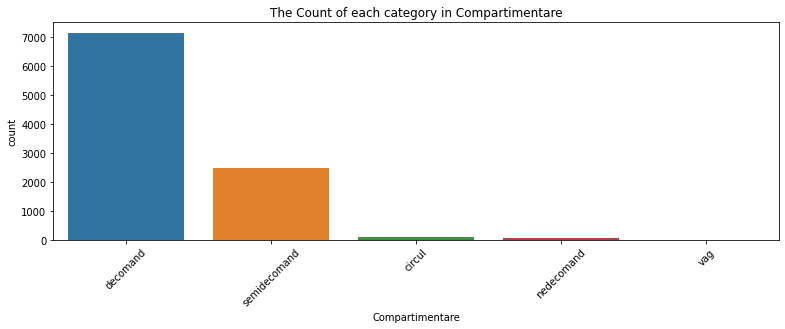

Number of unique values in Compartimentare is: 6
decomand        73.354489
semidecomand    25.273825
circul           0.829153
nedecomand       0.511823
vag              0.030709
Name: Compartimentare, dtype: float64


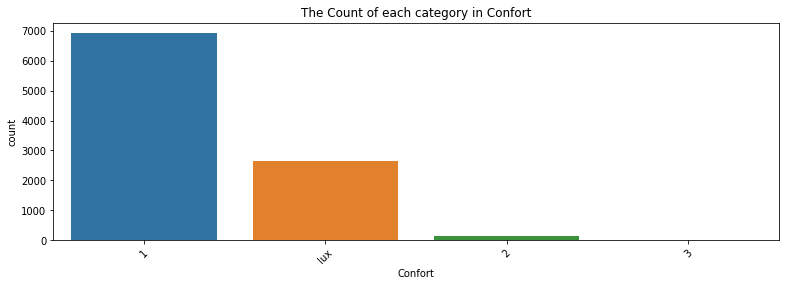

Number of unique values in Confort is: 5
1      71.325648
lux    27.233429
2       1.276245
3       0.164677
Name: Confort, dtype: float64


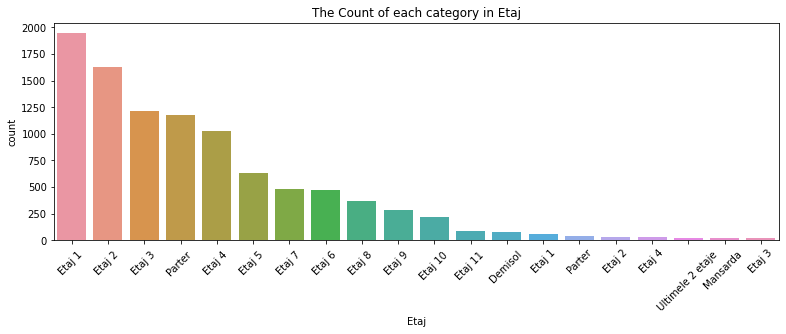

Number of unique values in Etaj is: 38
Etaj 1               19.461677
Etaj 2               16.249750
Etaj 3               12.177306
Parter               11.747048
Etaj 4               10.296178
Etaj 5                6.303782
Etaj 7                4.842906
Etaj 6                4.762858
Etaj 8                3.672203
Etaj 9                2.861717
Etaj 10               2.191315
Etaj 11               0.860516
Demisol               0.810486
Etaj 1                0.600360
Parter                0.450270
Etaj 2                0.350210
Etaj 4                0.290174
Ultimele 2 etaje      0.260156
Mansarda              0.260156
Etaj 3                0.220132
Etaj 5                0.180108
Etaj 8                0.150090
Etaj 12               0.140084
Etaj 7                0.140084
Etaj 15               0.120072
Etaj 14               0.110066
Etaj 10               0.090054
Etaj 13               0.080048
Etaj 6                0.070042
Etaj 9                0.040024
Mansarda              0.040024


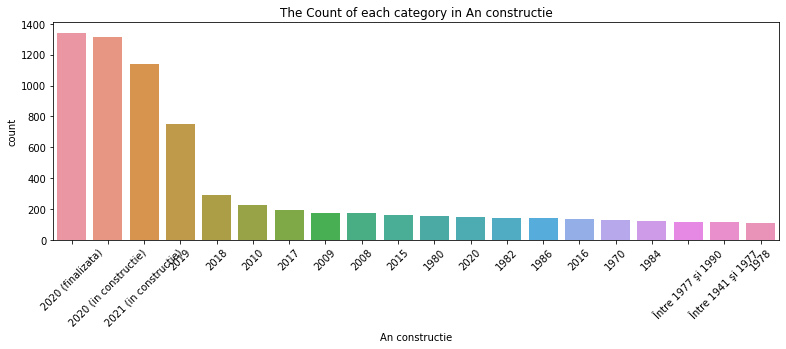

Number of unique values in An constructie is: 123
2020 (finalizata)        13.646532
2020 (in constructie)    13.361806
2021 (in constructie)    11.572097
2019                      7.636770
2018                      2.938784
2010                      2.277812
2017                      1.982916
2009                      1.789709
2008                      1.779540
2015                      1.647346
1980                      1.565996
2020                      1.494814
1982                      1.443970
1986                      1.443970
2016                      1.342282
1970                      1.301607
1984                      1.210087
Între 1977 şi 1990        1.199919
Între 1941 şi 1977        1.159243
1978                      1.098231
2022 (in constructie)     1.077893
1977                      1.047387
1976                      1.037218
2012                      1.016880
2014                      1.006711
2007                      0.996543
1985                      0.976205
1940 

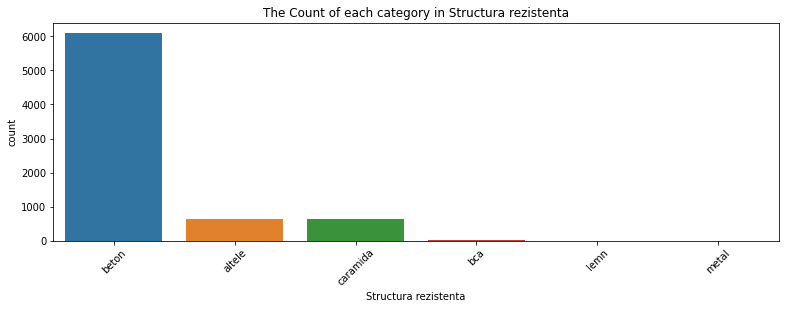

Number of unique values in Structura rezistenta is: 7
beton       82.468500
altele       8.725105
caramida     8.657364
bca          0.121935
lemn         0.013548
metal        0.013548
Name: Structura rezistenta, dtype: float64


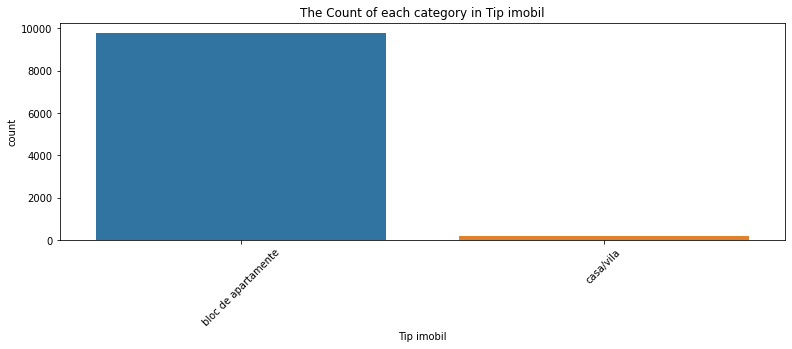

Number of unique values in Tip imobil is: 3
bloc de apartamente    98.172324
casa/vila               1.827676
Name: Tip imobil, dtype: float64


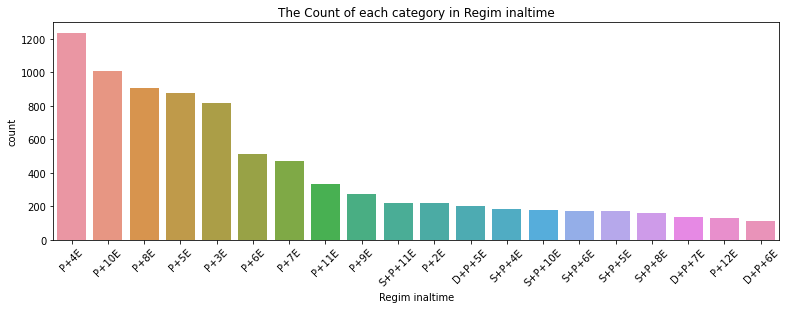

Number of unique values in Regim inaltime is: 114
P+4E           12.653563
P+10E          10.339885
P+8E            9.264947
P+5E            8.968059
P+3E            8.353808
P+6E            5.221130
P+7E            4.811630
P+11E           3.388616
P+9E            2.805078
S+P+11E         2.272727
P+2E            2.242015
D+P+5E          2.057740
S+P+4E          1.863227
S+P+10E         1.801802
S+P+6E          1.750614
S+P+5E          1.730139
S+P+8E          1.627764
D+P+7E          1.371826
P+12E           1.361589
D+P+6E          1.146601
S+P+3E          1.013514
S+P+7E          0.941851
D+P+8E          0.767813
D+P+3E          0.747338
D+P+4E          0.706388
P+2E+M          0.706388
S+P+12E         0.655201
P+3E+M          0.593776
S+P+9E          0.552826
D+P+10E         0.429975
P+1E            0.378788
S+P+2E+M        0.348075
S+P             0.276413
P+14E           0.266175
P+5E+M          0.255938
D+P+8E+M        0.255938
P+15E           0.245700
D+P+2E          0.245700


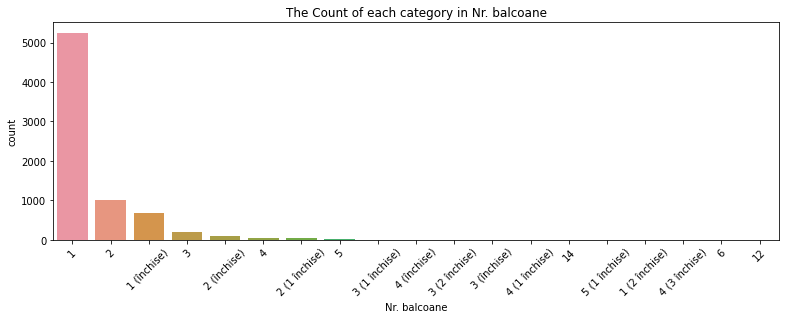

Number of unique values in Nr. balcoane is: 20
1                71.254072
2                13.816504
1 (închise)       9.283388
3                 2.700869
2 (închise)       1.302932
4                 0.610749
2 (1 închise)     0.515744
5                 0.122150
3 (1 închise)     0.095005
4 (închise)       0.067861
3 (2 închise)     0.067861
3 (închise)       0.054289
4 (1 închise)     0.027144
14                0.013572
5 (1 închise)     0.013572
1 (2 închise)     0.013572
4 (3 închise)     0.013572
6                 0.013572
12                0.013572
Name: Nr. balcoane, dtype: float64


In [10]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']
print('There are {} categorical variables in our dataset.'.format(len(categorical_features)))


for feature in categorical_features:
    plt.figure(figsize=(13, 4))
    sns.countplot(feature, data=df_copy, order=df_copy[feature].value_counts().iloc[:20].index)
    plt.title('The Count of each category in {}'.format(feature))
    plt.xticks(rotation=45)
    plt.show()
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique())))
    print(df_copy[feature].value_counts(normalize=True) * 100)
   

## 2. Numerical Variables

With regards to numerical variables, we will try to deduce some statistical details i.e. the central tendency (where the center of our data is) and measures of dispersion (how spread the data are). Mean, median and mode are the 3 central tendency measures. Mean is commonly used but very sensitive to extreme values, median however, is expected to be utilized in such cases. Mode should be applied for categorical data. Variance and standard deviation explain the spread of data around a central value. Represented below are the count, mean, standard deviation, and the 5 quartiles of each independent numerical variable. 

In [11]:
df_copy.describe()

,Nr camere,Suprafata utila,Suprafata utila totala,Suprafata construita,Nr. bucatarii,Nr. bai,Nr. garaje,Nr. locuri parcare,Pret
count,9993.000000,9924.000000,3499.000000,8899.000000,8486.000000,9543.000000,495.000000,2488.000000,9.994000e+03
mean,2.478235,73.204442,106.292004,103.632751,1.009899,1.457403,1.264646,1.512862,1.349937e+05
std,0.932978,41.612702,1696.399787,1336.377401,0.213611,0.680325,2.501955,4.896007,1.923343e+05
min,1.000000,4.064000,15.000000,1.092000,1.000000,1.000000,1.000000,1.000000,1.200000e+03
25%,2.000000,51.000000,53.000000,60.000000,1.000000,1.000000,1.000000,1.000000,6.200000e+04
50%,2.000000,63.000000,63.000000,74.000000,1.000000,1.000000,1.000000,1.000000,8.700000e+04
75%,3.000000,82.000000,82.800000,97.905000,1.000000,2.000000,1.000000,1.000000,1.375000e+05
max,12.000000,621.000000,100000.000000,126034.000000,12.000000,11.000000,55.000000,99.000000,6.000000e+06


Also, we would like to see how the distribution our data falls under presents itself. Many numerical variables contain outliers (extreme values that could negatively impact statistical analysis). To visualise this, we will be utilizing Histograms and Box-And-Whiskers plots a.k.a Box plots. Box plots are composed of 5 stages, mentioned previously, which statistically explain the data, these are: minimum value, 1st quartile, median, 3rd quartile, and maximum value. Most importantly, box plots reveal the outliers of our data as well. We can clearly see that many of our numerical variables contain outliers. Fully understanding the negative impacts of outliers will prove to be a valuable skill in deciding what the solution for treating them should be:

- Outliers increase residual error 
- Outliers decrease power of statistical tests
- Outliers may decrease normality
-  Outliers may impact the assumptions of Regression



There are 9 numerical variables in our dataset.


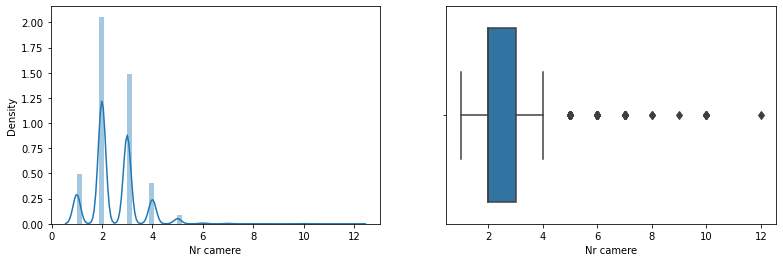

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr camere is: 12


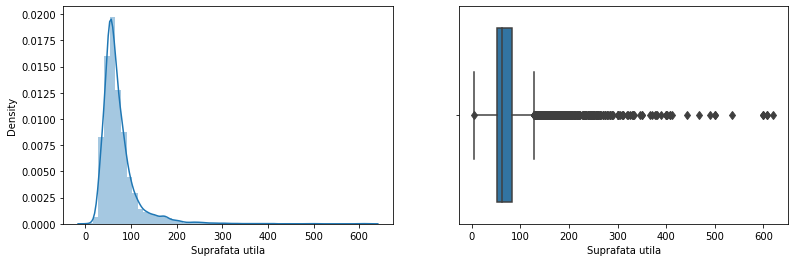

<Figure size 936x288 with 0 Axes>

Number of unique values in Suprafata utila is: 1523


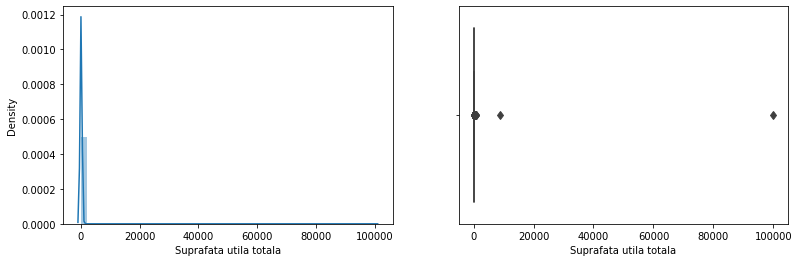

<Figure size 936x288 with 0 Axes>

Number of unique values in Suprafata utila totala is: 739


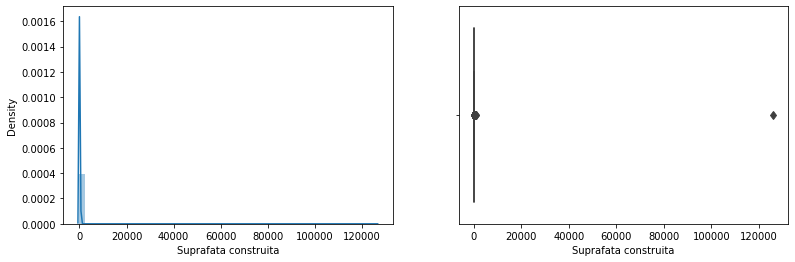

<Figure size 936x288 with 0 Axes>

Number of unique values in Suprafata construita is: 1296


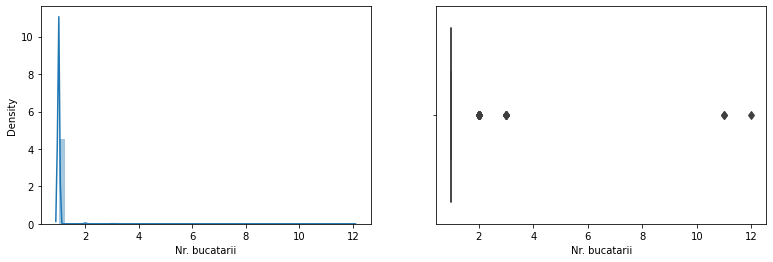

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. bucatarii is: 6


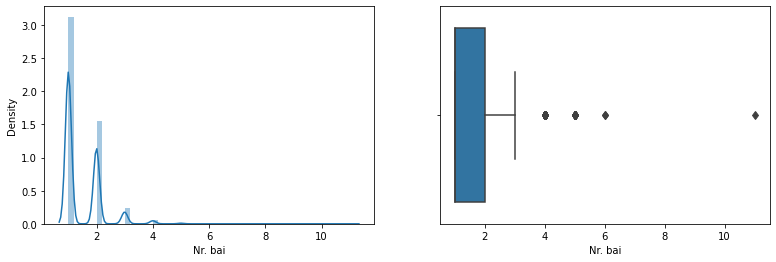

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. bai is: 8


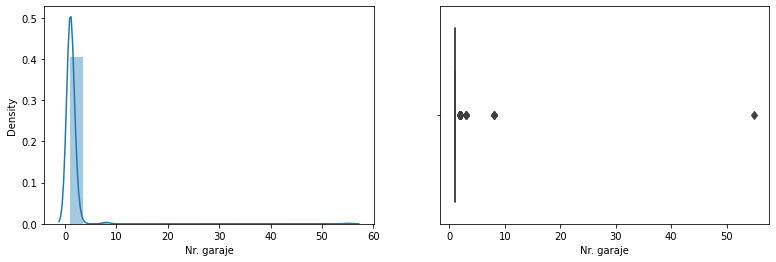

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. garaje is: 6


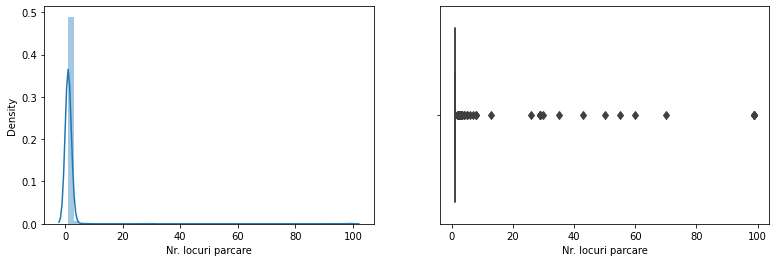

<Figure size 936x288 with 0 Axes>

Number of unique values in Nr. locuri parcare is: 20


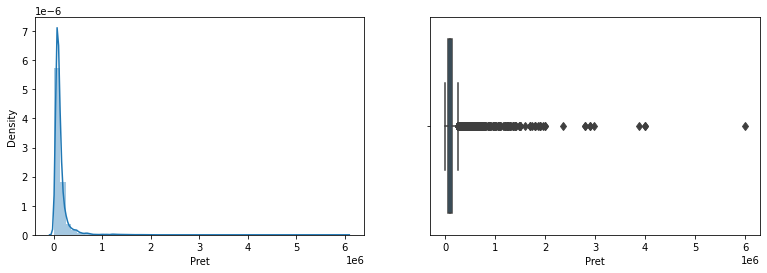

<Figure size 936x288 with 0 Axes>

Number of unique values in Pret is: 2171


In [12]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
print('There are {} numerical variables in our dataset.'.format(len(numerical_features)))

for feature in numerical_features:
    fig, ax = plt.subplots(ncols = 2, figsize=(13, 4))
    plt.figure(figsize=(13, 4))
    sns.distplot(df_copy[feature], ax=ax[0])
    sns.boxplot(df_copy[feature], ax=ax[1], fliersize=6)
    plt.show()
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique()))) 